In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import researchpy as rp
import pylab
import scipy.stats as stats
from statsmodels.stats.descriptivestats import sign_test
from scipy.stats import shapiro
from scipy.stats import kruskal

In [4]:
data_set = sns.load_dataset("tips")
df = data_set.copy()
df.rename(columns = {"total_bill":"fatura","tip":"bahsis","sex":"cinsiyet",
                    "smoker":"sigara","day":"gun","time":"zaman","size":"grup_sayısı"},inplace = True)
df.head()

,fatura,bahsis,cinsiyet,sigara,gun,zaman,grup_sayısı
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# Burada fatura kısmına bahsis kısmıda eklenmiş bunu çıkarmak gerek

In [6]:
df["fatura"] = df["fatura"] - df["bahsis"]
df.head()

,fatura,bahsis,cinsiyet,sigara,gun,zaman,grup_sayısı
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fatura,244.0,16.787664,8.032459,2.07,11.0,14.555,20.6850,43.17
bahsis,244.0,2.998279,1.383638,1.00,2.0,2.900,3.5625,10.00
grup_sayısı,244.0,2.569672,0.951100,1.00,2.0,2.000,3.0000,6.00


In [8]:
#Sayısal değerler için gözlem
rp.summary_cont(df[["fatura","grup_sayısı","bahsis"]]) 
# N=gözlem sayısı
# SD=standart sapma
# SE=standart hata
# güven aralıkları

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,fatura,244.0,16.787664,8.032459,0.514225,15.774756,17.800572
1,grup_sayısı,244.0,2.569672,0.951100,0.060888,2.449737,2.689608
2,bahsis,244.0,2.998279,1.383638,0.088578,2.823799,3.172758


In [9]:
# Bu sefer kategorik değişkenler için
rp.summary_cat(df[["cinsiyet","sigara","gun"]])

,Variable,Outcome,Count,Percent
0,cinsiyet,Male,157,64.34
1,,Female,87,35.66
2,sigara,No,151,61.89
3,,Yes,93,38.11
4,gun,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


# Güven Aralığı

In [10]:
odeme = df.fatura
print("Ortalama Fatura Tutarı:",odeme.mean())

Ortalama Fatura Tutarı: 16.787663934426238


In [11]:
sonuc = sms.DescrStatsW(odeme).tconfint_mean()
print("%95 güvenirlilik ile belirlenen aralık :",sonuc)

NameError: name 'sms' is not defined

In [12]:
bahsis2 = df.bahsis
print("Ortalama Verilen Bahsis Tutarı:",bahsis2.mean())

Ortalama Verilen Bahsis Tutarı: 2.9982786885245902


In [13]:
sonuc = sms.DescrStatsW(bahsis2).tconfint_mean()
print("%95 güvenirlilik ile belirlenen aralık :",sonuc)

NameError: name 'sms' is not defined

# Hipotez Testi

<b style="color:orange">H0: Ortalama fatura tutarı 19'dur</b>

<b style="color:orange">H1: Ortalama fatura tutarı 19 değildir.</b>

In [14]:
print("Ortalama Ödeme :",odeme.mean())

Ortalama Ödeme : 16.787663934426238


In [15]:
# bunun doğruluğunu test etmemiz gerekir

In [16]:
odeme = np.array(df.fatura)
odeme[0:5]

array([15.98,  8.68, 17.51, 20.37, 20.98])

In [17]:
stats.describe(odeme)

DescribeResult(nobs=244, minmax=(2.07, 43.17), mean=16.78766393442623, variance=64.52038999359104, skewness=1.1422965268183725, kurtosis=1.1256194248804796)

In [18]:
print("Gözlem Sayısı:",stats.describe(odeme)[0])
print("Min-Max Aralığı:",stats.describe(odeme)[1])
print("Ortalama Ödeme:",stats.describe(odeme)[2])
print("Ödeme Varyansı:",stats.describe(odeme)[3])
print("Ödeme Çarpıklığı :",stats.describe(odeme)[4])

Gözlem Sayısı: 244
Min-Max Aralığı: (2.07, 43.17)
Ortalama Ödeme: 16.78766393442623
Ödeme Varyansı: 64.52038999359104
Ödeme Çarpıklığı : 1.1422965268183725


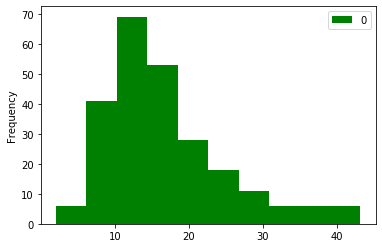

In [19]:
pd.DataFrame(odeme).plot.hist(color="green");

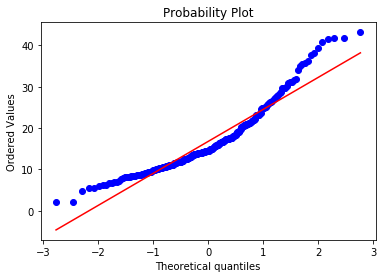

In [20]:
stats.probplot(odeme,dist="norm",plot=pylab)
pylab.show()

In [23]:
shapiro(odeme)

(0.9135652184486389, 1.1060377613780759e-10)

In [24]:
test_istatistigi,p_value = shapiro(odeme)
print('Test İstatistiği = %.4f \np-value = %.4f' % (test_istatistigi, p_value))

Test İstatistiği = 0.9136 
p-value = 0.0000


In [19]:
test_istatistigi,p_value = sign_test(odeme, 19)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, p_value))

Test İstatistiği = -51.0000, p-değeri = 0.0000


In [25]:
 #Normallik varsayımı sağlanmadığı taktirde
# p-value değeri 0.05'ten küçük olduğu için H0 hipotezi red.Ortalama toplanan ödenen miktar 19 değildir

<b style="color:red">H0 hipotezi reddedilir.Ortalama değerimiz 16'dır</b>

# AB Testi

<b style="color:orange">H0 : Kadınlar ile erkeklerin harcamalarının ortalamarı eşittir.</b>

<b style="color:orange">H1 : Kadınlar ile erkeklerin harcamalarının ortalamarı eşit değildir</b>

In [27]:
df.groupby("cinsiyet").fatura.sum()

cinsiyet
Male      2771.75
Female    1324.44
Name: fatura, dtype: float64

In [28]:
df.groupby("cinsiyet").fatura.mean()

cinsiyet
Male      17.654459
Female    15.223448
Name: fatura, dtype: float64

In [29]:
df2 = df[["cinsiyet","fatura"]]
df2.head()

,cinsiyet,fatura
0,Female,15.98
1,Male,8.68
2,Male,17.51
3,Male,20.37
4,Female,20.98


In [30]:
n_df = np.array(df2)
n_df[0:6]

array([['Female', 15.979999999999999],
       ['Male', 8.68],
       ['Male', 17.51],
       ['Male', 20.37],
       ['Female', 20.98],
       ['Male', 20.58]], dtype=object)

In [31]:
erkek_odeme = list()
for i in n_df:
    if (i[0] == "Male"):
        erkek_odeme.append(i[1])
print(erkek_odeme[0:5])
print("Eleman Sayısı :",len(erkek_odeme))

[8.68, 17.51, 20.37, 20.58, 6.77]
Eleman Sayısı : 157


In [32]:
kadın_odeme = list()
for i in n_df:
    if (i[0] == "Female"):
        kadın_odeme.append(i[1])
print(kadın_odeme[0:5])
print("Eleman Sayısı :",len(kadın_odeme))

[15.979999999999999, 20.98, 30.259999999999998, 11.81, 8.66]
Eleman Sayısı : 87


In [33]:
kadın = pd.DataFrame({"Female": kadın_odeme})
kadın.head()

,Female
0,15.98
1,20.98
2,30.26
3,11.81
4,8.66


In [34]:
erkek = pd.DataFrame({"Male": erkek_odeme})
erkek.head()

,Male
0,8.68
1,17.51
2,20.37
3,20.58
4,6.77


In [35]:
# Normallik Varsayımı

In [36]:
test_istatistigi,p_value = shapiro(erkek_odeme)
print('Test İstatistiği = %.4f \np-değeri = %.4f' % (test_istatistigi, p_value))

Test İstatistiği = 0.9179 
p-değeri = 0.0000


In [38]:
test_istatistigi,p_value = shapiro(kadın_odeme)
print('Test İstatistiği = %.4f \np-değeri = %.4f' % (test_istatistigi, p_value))

Test İstatistiği = 0.9085 
p-değeri = 0.0000


<b>Her iki durumdada normallik varsayımımız sağlanmamıştır</b>

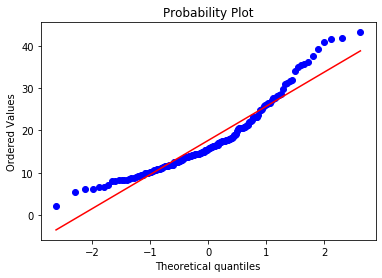

In [51]:
stats.probplot(erkek_odeme,dist="norm",plot=pylab)
pylab.show()

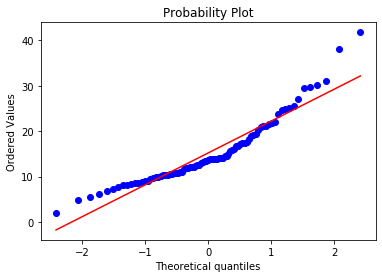

In [52]:
stats.probplot(kadın_odeme,dist="norm",plot=pylab)
pylab.show()

In [53]:
#Grafik ile de normallik varsayımı sağlanmadığınu gösterdik

In [54]:
#Varyans Homojenliği

<b style="color:green">H0 : Varyanslar homojendir</b>

<b style="color:green">H1 : Varyanslar homojen değildir</b>

In [97]:
stats.levene(erkek_odeme,kadın_odeme)
# p-value > 0.05 varyanslar homojendir.

LeveneResult(statistic=1.5258427966098143, pvalue=0.21793531496535953)

In [39]:
stats.mannwhitneyu(erkek,kadın)

MannwhitneyuResult(statistic=5543.5, pvalue=0.007460615814308236)

<b>ManWithneyU vermiş olduğu p-value değeri 0.05'ten küçük olduğu için H0 hipotezi reddedilir.Buradan çıkan sonuçla H1 hipotezimizin dediği gibi; kadınlar ile erkeklerin harcamalarının ortalamarı eşit değildir sonucuna varmış olduk.</b>

# Kolersayon Analizi

<b style="color:orange">H0 = Fatura değişkeni ile bahşiş değişkeni arasında kolerasyon yoktur</b>

<b style="color:orange">H1 = Fatura değişkeni ile bahşiş değişkeni  arasında kolerasyon vardır</b>

In [40]:
# normal olup olmadığını test ettik
test_istatistigi, pvalue = shapiro(df["fatura"])
print('FATURA ==> Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))
test_istatistigi, pvalue = shapiro(df["bahsis"])
print('BAHSİS ==> Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

FATURA ==> Test İstatistiği = 0.9136, p-değeri = 0.0000
BAHSİS ==> Test İstatistiği = 0.8978, p-değeri = 0.0000


In [41]:
df["bahsis"].corr(df["fatura"],method = "spearman")

0.593691939408997

In [42]:
test_istatistigi,p_value = stats.spearmanr(df["bahsis"],df["fatura"])
print("p-value: %.4f " % p_value)

p-value: 0.0000 


<b>p-value 0.05'ten küçük olduğundan dolayı ilk başta kurmuş olduğumuz H0 hipotezi reddeilir yani değişkenler arası kolerasyon vardır</b>

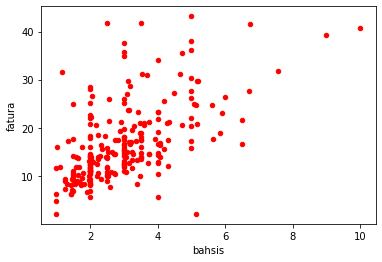

In [71]:
df.plot.scatter("bahsis","fatura",color = "red");

# Varyans Analizi

<b style="color:orange">H0 : Kadın gruplar ve erkek gruplar harcamaları arasında istatistiki bir anlam yoktur.</b>

<b style="color:orange">H1 : Kadın gruplar ve erkek gruplar harcamaları arasında istatistiki bir anlam vardır.</b>

In [72]:
kadın.head()

,Female
0,15.98
1,20.98
2,30.26
3,11.81
4,8.66


In [73]:
erkek.head()

,Male
0,8.68
1,17.51
2,20.37
3,20.58
4,6.77


In [87]:
kadın.mean()

Female    15.223448
dtype: float64

In [88]:
erkek.mean()

Male    17.654459
dtype: float64

In [75]:
p_value = shapiro(erkek)[1]
print("p-value = %.4f" %  p_value)

p-value = 0.0000


In [76]:
shapiro(kadın)[1]
print("p-değeri = %.4f" %  p_value)

p-değeri = 0.0000


In [77]:
# p-value < 0.05 normal dağılım değildir.

In [80]:
stats.levene(kadın_odeme,erkek_odeme)
# p-value > 0.05 varyanslar homojendir.

LeveneResult(statistic=1.5258427966098143, pvalue=0.21793531496535953)

In [81]:
# Normallik varsayımı sağlanmadığından Nonparametrik hipotez testi kullanılır;
test_istatistigi,p_value = kruskal(kadın,erkek)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 5.9304, p-değeri = 0.0000


<b>Kadın gruplar ve erkek gruplar harcamaları arasında istatistiki bir anlam vardır</b>